#### 1. Import Libraries : Import necessary Python libraries for data manipulation, visualization, and clustering

In [1]:
#pip install --upgrade pandas seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

#### 2. Load Data : Load the dataset into a pandas DataFrame.
#### 3. Data Dictionary : Load a data dictionary that describes the dataset

In [3]:
data = pd.read_csv('ML3 data.csv')
cd = pd.read_excel('Data_Description.xlsx')

In [4]:
data.head(2)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746


In [5]:
cd.head(2)

,Variable Name,Variable Description,Data File Name,Data File Description,Begin Year,EndYear,Component,Use Constraints
0,SEQN,Respondent sequence number.,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
1,SDDSRVYR,Data release cycle,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN


#### 4. Initial Data Exploration : Check the shape of the DataFrame and the number of missing values.

In [6]:
print("General information about the main data :")
print(data.info())
print("\nGeneral information about the column description data :")
print(cd.info())

General information about the main data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 662 entries, SEQN to ar25
dtypes: float64(641), int64(21)
memory usage: 49.6 MB
None

General information about the column description data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variable Name          636 non-null    object 
 1   Variable Description   636 non-null    object 
 2   Data File Name         636 non-null    object 
 3   Data File Description  636 non-null    object 
 4   Begin Year             636 non-null    int64  
 5   EndYear                636 non-null    int64  
 6   Component              636 non-null    object 
 7   Use Constraints        0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 39.9+ KB
None


In [7]:
print("The data csv's shape is ", data.shape)
print("The column description csv's shape is ", cd.shape)

The data csv's shape is  (9813, 662)
The column description csv's shape is  (636, 8)


In [8]:
print("Total null values in the main dataframe is ", data.isnull().sum().sum())
print("Total null values in the column description is ", cd.isnull().sum().sum())

Total null values in the main dataframe is  3326124
Total null values in the column description is  636


In [9]:
print("Different components described in description table are:")
cd['Component'].unique()

Different components described in description table are:


array(['Demographics', 'Dietary', 'Laboratory'], dtype=object)

#### 5. Data Cleaning : Fill missing values in dietary columns with zeros based on the assumption that they are question answers.

In [10]:
dieteryColumns = cd[cd['Component'] == 'Dietary']["Variable Name"]
for col in dieteryColumns :
    data[col].fillna(0, inplace = True)

#### 6. Demographic Data Cleaning : Fill missing values in demographic columns with zeros.

In [11]:
demographicsColumns = cd[cd['Component'] == 'Demographics']["Variable Name"]
for col in demographicsColumns :
    data[col].fillna(0, inplace = True)

#### 7. Laboratory Data Cleaning : Fill missing values in laboratory columns with zeros.

In [12]:
labColumns = cd[cd['Component'] == 'Laboratory']["Variable Name"]
for col in labColumns :
    data[col].fillna(0, inplace = True)

#### 8. Final Missing Value Handling : Fill any remaining missing values in the dataset with zeros.

In [13]:
data.fillna(0, inplace = True)

#### 9. Feature Selection : Select numerical features for clustering and drop non-essential columns.

In [14]:
main_features = pd.concat([dieteryColumns, demographicsColumns, labColumns], axis=0)
print(main_features)

47       WTDRD1
48       WTDR2D
49     DR1DRSTZ
50     DR1EXMER
51        DRABF
         ...   
631    URDUURLC
632     URXPREG
633      URXUAS
634      LBDB12
635    LBDB12SI
Name: Variable Name, Length: 636, dtype: object


In [15]:
data = data.drop_duplicates()
cd = cd.drop_duplicates()

In [16]:
data = data.loc[:, ~data.T.duplicated()]
cd = cd.loc[:, ~cd.T.duplicated()]

In [17]:
print("The main data csv's shape after duplicate rows and columns drop is ", data.shape)
print("The description data csv's shape after duplicate rows and columns drop is ", cd.shape)

The main data csv's shape after duplicate rows and columns drop is  (9813, 648)
The description data csv's shape after duplicate rows and columns drop is  (542, 8)


#### 10. Data Transformation : Scale the numerical features using MinMaxScaler

In [18]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

#### 11. Optimal Cluster Identification : Use silhouette scores and the elbow method to find the optimal number of clusters for KMeans

In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss = []
max_k_Check = 31
for k in range(1, max_k_Check):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

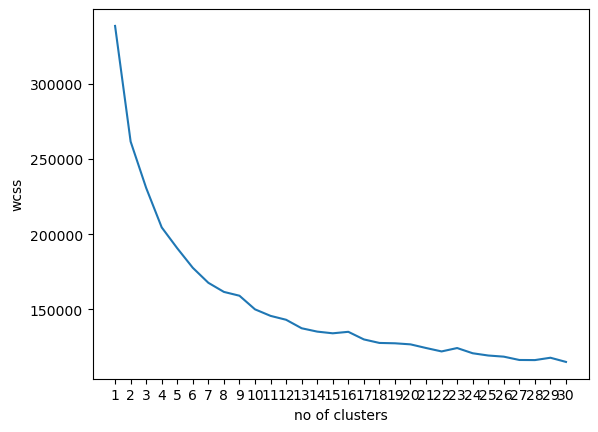

In [21]:
plt.plot(range(1,max_k_Check), wcss)
plt.xticks(range(1, max_k_Check))
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

In [22]:
k = 9 # Considered based on above plotted graph
kmeans = KMeans(n_clusters=k,init="k-means++")
data_pred = kmeans.fit_predict(data_scaled)

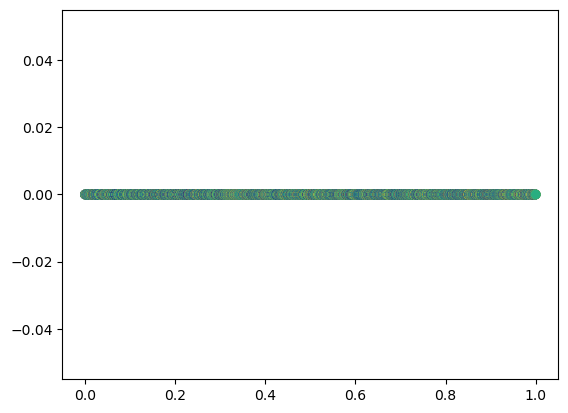

In [23]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=data_pred)
plt.show()

In [24]:
from kneed import KneeLocator
kl = KneeLocator(range(1, max_k_Check), wcss, curve = "convex", direction = "decreasing")
elbow_k = kl.elbow
print(f"K value determined using elbow method is {elbow_k}")

K value determined using elbow method is 10


In [25]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, max_k_Check) :
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.21439688115521463, 0.22519924249998188, 0.20472843836286786, 0.20529186558640852, 0.1766860077367129, 0.20805793429502695, 0.15601869705773616, 0.1824635563811667, 0.18261156570014037, 0.1712484949989721, 0.15347926140488868, 0.15737405703219373, 0.15364745079740338, 0.15314030821656074, 0.15474935226798583, 0.15919336130711365, 0.14452738762123737, 0.1402173137463484, 0.14343561881598207, 0.14435183742868782, 0.13835632696258174, 0.14018907613718565, 0.15071426404267765, 0.14517923814121667, 0.13272204056093137, 0.12755991955173657, 0.13149007568644552, 0.1266481520682038, 0.13523630698099853]


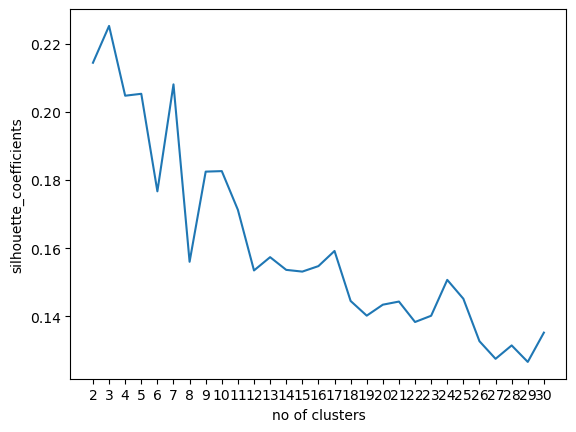

In [26]:
plt.plot(range(2, max_k_Check), silhouette_coefficients)
plt.xticks(range(2, max_k_Check))
plt.xlabel("no of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

#### 12. KMeans Clustering : Perform KMeans clustering with the identified optimal number of clusters.

In [27]:
kmeans = KMeans(n_clusters=elbow_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels

#### 13. Correlation Analysis : Analyze the correlation of features with the cluster labels to identify highly correlated features.

In [28]:
corr_matrix = data.corr().abs()
corr_matrix_cols = corr_matrix.columns

In [29]:
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
threshold = 0.9
to_drop = set()
for i in range(len(upper.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = upper.columns[i]
            if colname not in to_drop:
                to_drop.add(colname)
data = data.drop(columns=to_drop)

In [30]:
print("The main data csv's shape after highly correlated columns' drop is ", data.shape)

The main data csv's shape after highly correlated columns' drop is  (9813, 393)


#### 14. Principal Component Analysis (PCA) : Perform PCA to reduce dimensionality while retaining 95% of the variance.

In [31]:
from sklearn.decomposition import PCA

In [32]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)

In [33]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Original features: {X_scaled.shape[1]}")
print(f"Reduced features after PCA: {X_pca.shape[1]}")

Original features: 393
Reduced features after PCA: 104


#### 15. KMeans with PCA : Apply KMeans clustering on the principal components and visualize the clusters in a scatter plot.

In [34]:
silhouette_scores = []
inertias = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
kl = KneeLocator(K, inertias, curve="convex", direction="decreasing")
elbow_k = kl.elbow
print(f"Elbow method optimal k: {kl.elbow}")
print(f"Silhouette optimal k: {K[silhouette_scores.index(max(silhouette_scores))]}")

Elbow method optimal k: 7
Silhouette optimal k: 3


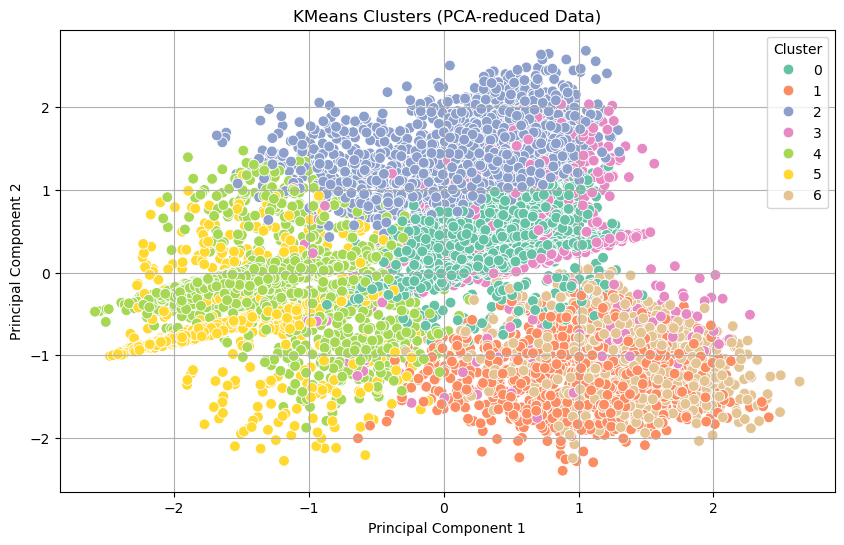

In [35]:
kmeans = KMeans(n_clusters=elbow_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('KMeans Clusters (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

#### 16. DBSCAN Clustering : Attempt DBSCAN clustering on the principal components and evaluate the results.

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
epss = [3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.7]
for ep in epss:
    print(f'----- {ep}')
    X_for_dbscan = X_pca
    dbscan = DBSCAN(eps=ep, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_for_dbscan)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    print(f"Estimated number of clusters: {n_clusters}")
    print(f"Estimated number of noise points: {n_noise}")
    if n_clusters > 1:
        sil_score = silhouette_score(X_for_dbscan, dbscan_labels)
        print(f"Silhouette Score: {sil_score:.4f}")
    else:
        print("Silhouette Score: Not applicable (less than 2 clusters)")

----- 3.7
Estimated number of clusters: 1
Estimated number of noise points: 3
Silhouette Score: Not applicable (less than 2 clusters)
----- 3.6
Estimated number of clusters: 1
Estimated number of noise points: 13
Silhouette Score: Not applicable (less than 2 clusters)
----- 3.5
Estimated number of clusters: 1
Estimated number of noise points: 26
Silhouette Score: Not applicable (less than 2 clusters)
----- 3.4
Estimated number of clusters: 1
Estimated number of noise points: 70
Silhouette Score: Not applicable (less than 2 clusters)
----- 3.3
Estimated number of clusters: 1
Estimated number of noise points: 169
Silhouette Score: Not applicable (less than 2 clusters)
----- 3.2
Estimated number of clusters: 2
Estimated number of noise points: 335
Silhouette Score: 0.0791
----- 3.1
Estimated number of clusters: 1
Estimated number of noise points: 636
Silhouette Score: Not applicable (less than 2 clusters)
----- 3.0
Estimated number of clusters: 2
Estimated number of noise points: 1038
Sil

In [37]:
from sklearn.neighbors import NearestNeighbors

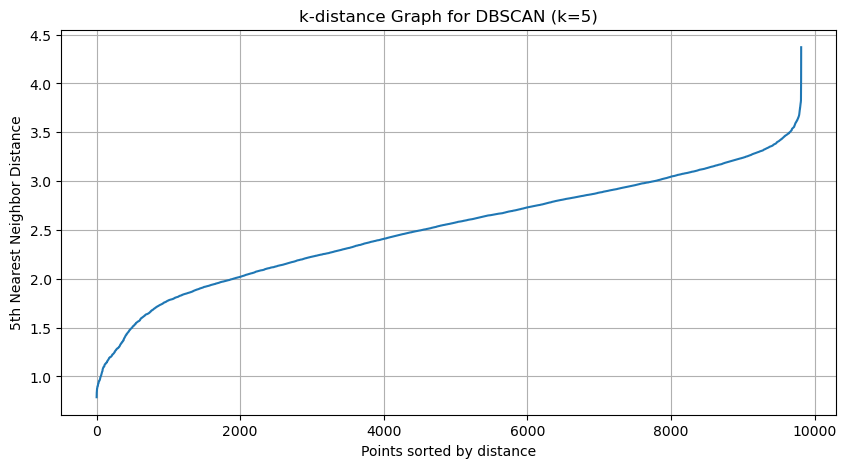

In [38]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("k-distance Graph for DBSCAN (k=5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [39]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

X_for_dbscan = X_pca
dbscan = DBSCAN(eps=3.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_for_dbscan)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Step 3: Evaluate clustering quality
if n_clusters > 1:
    sil_score = silhouette_score(X_for_dbscan, dbscan_labels)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("Silhouette Score: Not applicable (less than 2 clusters)")

Estimated number of clusters: 2
Estimated number of noise points: 335
Silhouette Score: 0.0791


#### 17. Conclusion : Conclude the analysis by summarizing the steps taken and the findings from the clustering analysis.

In [40]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
score = silhouette_score(X_pca, kmeans_labels)
print(f"KMeans Silhouette Score: {score:.4f}")

KMeans Silhouette Score: 0.0857


Interpretation:
A silhouette score of 0.0991 is still quite low, meaning:
The clusters are not well separated,
Data points are not clearly closer to their own cluster vs others,
The structure in the data may not be naturally clusterable (at least linearly).

Both KMeans and DBSCAN are struggling to find strong, well-separated clusters.
This can happen if:
The features (even after PCA) don't contain meaningful group structure, or
The clusters are not globular (KMeans assumes spherical clusters),
The distance-based approach (like Euclidean) is not suited to your data.

In [41]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg.fit_predict(X_pca)

from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {score:.4f}")


Agglomerative Clustering Silhouette Score: 0.0753


DBSCAN (eps=3.2) with 3	clusters score is 0.0768
KMeans with 5 clusters score is 0.0991
Agglomerative with 3 clusters score is 0.0946

Determines:
KMeans has the best (yet modest) score, meaning it creates slightly more distinct clusters compared to the others.
All scores are < 0.2, which generally means:
There’s weak natural clustering in your dataset.
It may still be useful for exploratory segmentation, but not reliable for production or strong inferences.